# Introduction

Short notebook to get an overview of model performance across architectures and dimensionality. 

In [ ]:
# colab setup:

!git clone https>

In [8]:
# general setup:

import pandas as pd
import seaborn as sns
import json
import numpy as np

from NM_TinyRNN.code.models import parallelised_training as pat
from pathlib import Path
from importlib import reload

In [26]:
# you've trained a bunch of models with:

reload(pat)
#pat.run_training(overwrite=True)

#Here we append the evaluation performance to the model info dataframe

info_df = pat.get_train_info_df()
for model_info in info_df.itertuples():
    model_dir = Path(model_info.save_path)
    eval_json_path = model_dir / f'{model_info.model_id}_info.json'
    if eval_json_path.exists():
        with open(eval_json_path, 'r') as f:
            eval_info = json.load(f)
        info_df.loc[info_df.model_id==model_info.model_id, 'eval_CE'] = eval_info['eval_pred_loss']
        
#open the json and extract eval performance for each model:

<Axes: xlabel='model_type', ylabel='eval_CE'>

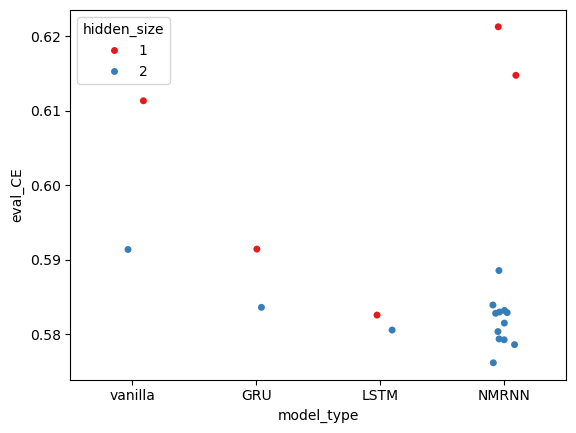

In [42]:
sns.stripplot(
    data=info_df,  
    y='eval_CE', 
    x='model_type',
    hue='hidden_size',
    jitter=True,
    dodge=False, palette='Set1',
)

In [36]:
info_df.eval_CE.argmin()

np.int64(14)

In [37]:
info_df.iloc[info_df.eval_CE.argmin()]

subject_ID                                    WS16
model_type                                   NMRNN
hidden_size                                      2
nm_size                                          1
nm_dim                                           2
nm_mode                                   low_rank
model_id        2_unit_NMRNN_1_subunits_2_low_rank
save_path      NM_TinyRNN/data/rnns/NMRNN/low_rank
data_path        NM_TinyRNN/data/AB_behaviour/WS16
completed                                     True
eval_CE                                   0.576179
Name: 14, dtype: object